# Subgradient descent

## Least squares with $l_1$ regularization

$$
\min_{x \in \mathbb{R^n}} \dfrac{1}{2}\|Ax - b\|_2^2 + \lambda \|x\|_1
$$

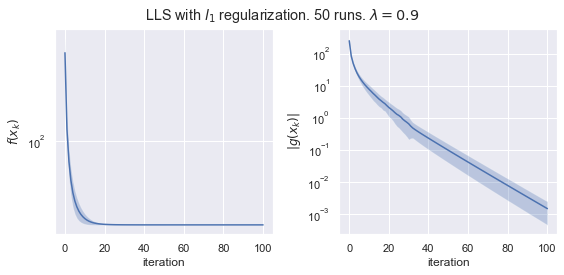

In [53]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(1)

# PARAMETERS
m = 50
n = 20
n_iter = 100
n_exp = 50
lam = 0.9
alpha = 0.01

f_vals_array = np.zeros((n_exp, n_iter+1))
g_norm_array = np.zeros((n_exp, n_iter+1))


def f(x, *f_params):
    A, b, lam = f_params
    return 0.5*np.linalg.norm(A@x - b, ord=2)**2 + lam*np.linalg.norm(x, ord=1)

def g(x, *f_params):
    A, b, lam = f_params
    return A.T@(A@x - b) + lam*np.sign(x)

def subgradient_descent(x_0, f, g, *f_params, alpha=0.001, n_iter=100):
    iterations = []
    f_vals     = []
    x          = np.array(x_0)
    iterations.append(x)
    f_vals.append(f(x, *f_params))
    for i_iter in range(n_iter):
        x = x - alpha * g(x, *f_params)
        iterations.append(x)
        f_vals.append(f(x, *f_params))
#     print(f'Finished with {len(iterations)} iterations and final value {f_vals[-1]}')
    return iterations, f_vals

A = np.random.randn(m, n)
b = np.random.randn(m)
for exp in range(n_exp):
    x_0 = np.random.randn(n)
    xs, f_vals_array[exp, :] = subgradient_descent(x_0, f, g, A, b, lam, alpha=alpha, n_iter = n_iter)
    g_norm_array[exp, :] = np.array([np.linalg.norm(g(x, A, b, lam)) for x in xs])
    
fig = plt.figure(figsize=(8,4))
fig.suptitle(f'LLS with $l_1$ regularization. {n_exp} runs. $\lambda = {lam}$')

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel(f'$f(x_k)$')
ax.set_xlabel('iteration')
ax.semilogy(f_vals_array.mean(axis=0)) 
ax.fill_between(np.arange(n_iter+1), f_vals_array.mean(axis=0) - f_vals_array.std(axis=0),  f_vals_array.mean(axis=0) + f_vals_array.std(axis=0), alpha=0.3)

ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel(f'$\|g(x_k)\|$')
ax.set_xlabel('iteration')
ax.semilogy(g_norm_array.mean(axis=0)) 
ax.fill_between(np.arange(n_iter+1), g_norm_array.mean(axis=0) - g_norm_array.std(axis=0),  g_norm_array.mean(axis=0) + g_norm_array.std(axis=0), alpha=0.3)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('SD.svg')
# plt.show()
